# Team 3 - Merchant Category Recommendation
## Feature Extraction

### Team 3
- Vinicio De Sola
- Kevin Hanna
- Pri Nonis
- Bradley Nott

The results from Feature Engineering should get cleaned up here before modeling. 

In [1]:
import numpy               as np
import matplotlib.pyplot   as plt
import pandas              as pd
import seaborn             as sb

from datetime              import timedelta, datetime

from sklearn               import metrics
from sklearn.decomposition import PCA
from sklearn.cluster       import KMeans
from sklearn.mixture       import GaussianMixture
from sklearn.linear_model  import LinearRegression

from matplotlib.colors     import LogNorm

from IPython.display       import HTML, Markdown

from sklearn.metrics       import mean_squared_error

%matplotlib inline

np.random.seed(0)

import os
print(os.listdir("./input"))

['historical_transactions.csv', '.ipynb_checkpoints', 'new_merchant_transactions.csv', 'engineered_test.pkl', '.~lock.Data_Dictionary.xlsx#', 'merchants.csv', 'sample_submission.csv', 'foo.csv', 'test.csv', 'Data_Dictionary.xlsx', 'engineered_train.pkl', '.gitignore', 'train.csv']


## Read in all the data files

In [2]:
train        = pd.read_pickle('input/engineered_train.pkl')
test         = pd.read_pickle('input/engineered_test.pkl')

target = train['target']
del train['target']

## A view of our new training data dataframe

In [3]:
display(train.head())
display(test.head())

feature_3  first_active_delta_days  feature_1_1  feature_1_2  \
card_id                                                                         
C_ID_92a2005557          1                      246            0            0   
C_ID_3d0044924f          0                      397            0            0   
C_ID_d639edf6cd          0                      550            0            1   
C_ID_186d6a6901          0                      154            0            0   
C_ID_cdbd2c0db2          0                       93            1            0   

                 feature_1_3  feature_1_4  feature_1_5  feature_2_1  \
card_id                                                               
C_ID_92a2005557            0            0            1            0   
C_ID_3d0044924f            0            1            0            1   
C_ID_d639edf6cd            0            0            0            0   
C_ID_186d6a6901            0            1            0            0   
C_ID_cdbd2c0db2            0            0            0            0   

                 feature_2_2  feature_2_3  \
card_id                                     
C_ID_92a2005557            1            0   
C_ID_3d0044924f            0            0   
C_ID_d639edf6cd            1            0   
C_ID_186d6a6901            0            1   
C_ID_cdbd2c0db2            0            1   

                                      ...                         \
card_id                               ...                          
C_ID_92a2005557                       ...                          
C_ID_3d0044924f                       ...                          
C_ID_d639edf6cd                       ...                          
C_ID_186d6a6901                       ...                          
C_ID_cdbd2c0db2                       ...                          

                 new_most_recent_sales_range_A_merchants_sum  \
card_id                                                        
C_ID_92a2005557                                          7.0   
C_ID_3d0044924f                                          1.0   
C_ID_d639edf6cd                                          0.0   
C_ID_186d6a6901                                          0.0   
C_ID_cdbd2c0db2                                          7.0   

                 new_most_recent_sales_range_B_merchants_sum  \
card_id                                                        
C_ID_92a2005557                                          1.0   
C_ID_3d0044924f                                          2.0   
C_ID_d639edf6cd                                          0.0   
C_ID_186d6a6901                                          1.0   
C_ID_cdbd2c0db2                                          3.0   

                 new_most_recent_sales_range_C_merchants_sum  \
card_id                                                        
C_ID_92a2005557                                          7.0   
C_ID_3d0044924f                                          0.0   
C_ID_d639edf6cd                                          1.0   
C_ID_186d6a6901                                          1.0   
C_ID_cdbd2c0db2                                         10.0   

                 new_most_recent_sales_range_D_merchants_sum  \
card_id                                                        
C_ID_92a2005557                                          5.0   
C_ID_3d0044924f                                          3.0   
C_ID_d639edf6cd                                          0.0   
C_ID_186d6a6901                                          5.0   
C_ID_cdbd2c0db2                                         13.0   

                 new_most_recent_sales_range_E_merchants_sum  \
card_id                                                        
C_ID_92a2005557                                          3.0   
C_ID_3d0044924f                                          0.0   
C_ID_d639edf6cd                                          0.0   
C_ID_186d6a6901                           

first_active_month  feature_3  first_active_delta_days  \
card_id                                                                  
C_ID_0ab67a22ab         2017-04-01          1                      307   
C_ID_130fd0cbdd         2017-01-01          0                      397   
C_ID_b709037bc5         2017-08-01          1                      185   
C_ID_d27d835a9f         2017-12-01          0                       63   
C_ID_2b5e3df5c2         2015-12-01          1                      794   

                 feature_1_1  feature_1_2  feature_1_3  feature_1_4  \
card_id                                                               
C_ID_0ab67a22ab            0            0            1            0   
C_ID_130fd0cbdd            0            1            0            0   
C_ID_b709037bc5            0            0            0            0   
C_ID_d27d835a9f            0            1            0            0   
C_ID_2b5e3df5c2            0            0            0            0   

                 feature_1_5  feature_2_1  feature_2_2  \
card_id                                                  
C_ID_0ab67a22ab            0            0            0   
C_ID_130fd0cbdd            0            0            0   
C_ID_b709037bc5            1            1            0   
C_ID_d27d835a9f            0            1            0   
C_ID_2b5e3df5c2            1            1            0   

                                      ...                         \
card_id                               ...                          
C_ID_0ab67a22ab                       ...                          
C_ID_130fd0cbdd                       ...                          
C_ID_b709037bc5                       ...                          
C_ID_d27d835a9f                       ...                          
C_ID_2b5e3df5c2                       ...                          

                 new_most_recent_sales_range_A_merchants_sum  \
card_id                                                        
C_ID_0ab67a22ab                                          0.0   
C_ID_130fd0cbdd                                          2.0   
C_ID_b709037bc5                                          1.0   
C_ID_d27d835a9f                                          5.0   
C_ID_2b5e3df5c2                                          0.0   

                 new_most_recent_sales_range_B_merchants_sum  \
card_id                                                        
C_ID_0ab67a22ab                                          0.0   
C_ID_130fd0cbdd                                          0.0   
C_ID_b709037bc5                                          1.0   
C_ID_d27d835a9f                                          4.0   
C_ID_2b5e3df5c2                                          1.0   

                 new_most_recent_sales_range_C_merchants_sum  \
card_id                                                        
C_ID_0ab67a22ab                                          1.0   
C_ID_130fd0cbdd                                          3.0   
C_ID_b709037bc5                                          0.0   
C_ID_d27d835a9f                                          1.0   
C_ID_2b5e3df5c2                                          1.0   

                 new_most_recent_sales_range_D_merchants_sum  \
card_id                                                        
C_ID_0ab67a22ab                                          2.0   
C_ID_130fd0cbdd                                          1.0   
C_ID_b709037bc5                                          0.0   
C_ID_d27d835a9f                                          0.0   
C_ID_2b5e3df5c2                                          3.0   

                 new_most_recent_sales_range_E_merchants_sum  \
card_id                                                        
C_ID_0ab67a22ab                                          0.0   
C_ID_130fd0cbdd                                          4.0   
C_ID_b709037bc5                                          0.0   

# Feature Extraction
Analyze and select features for modeling

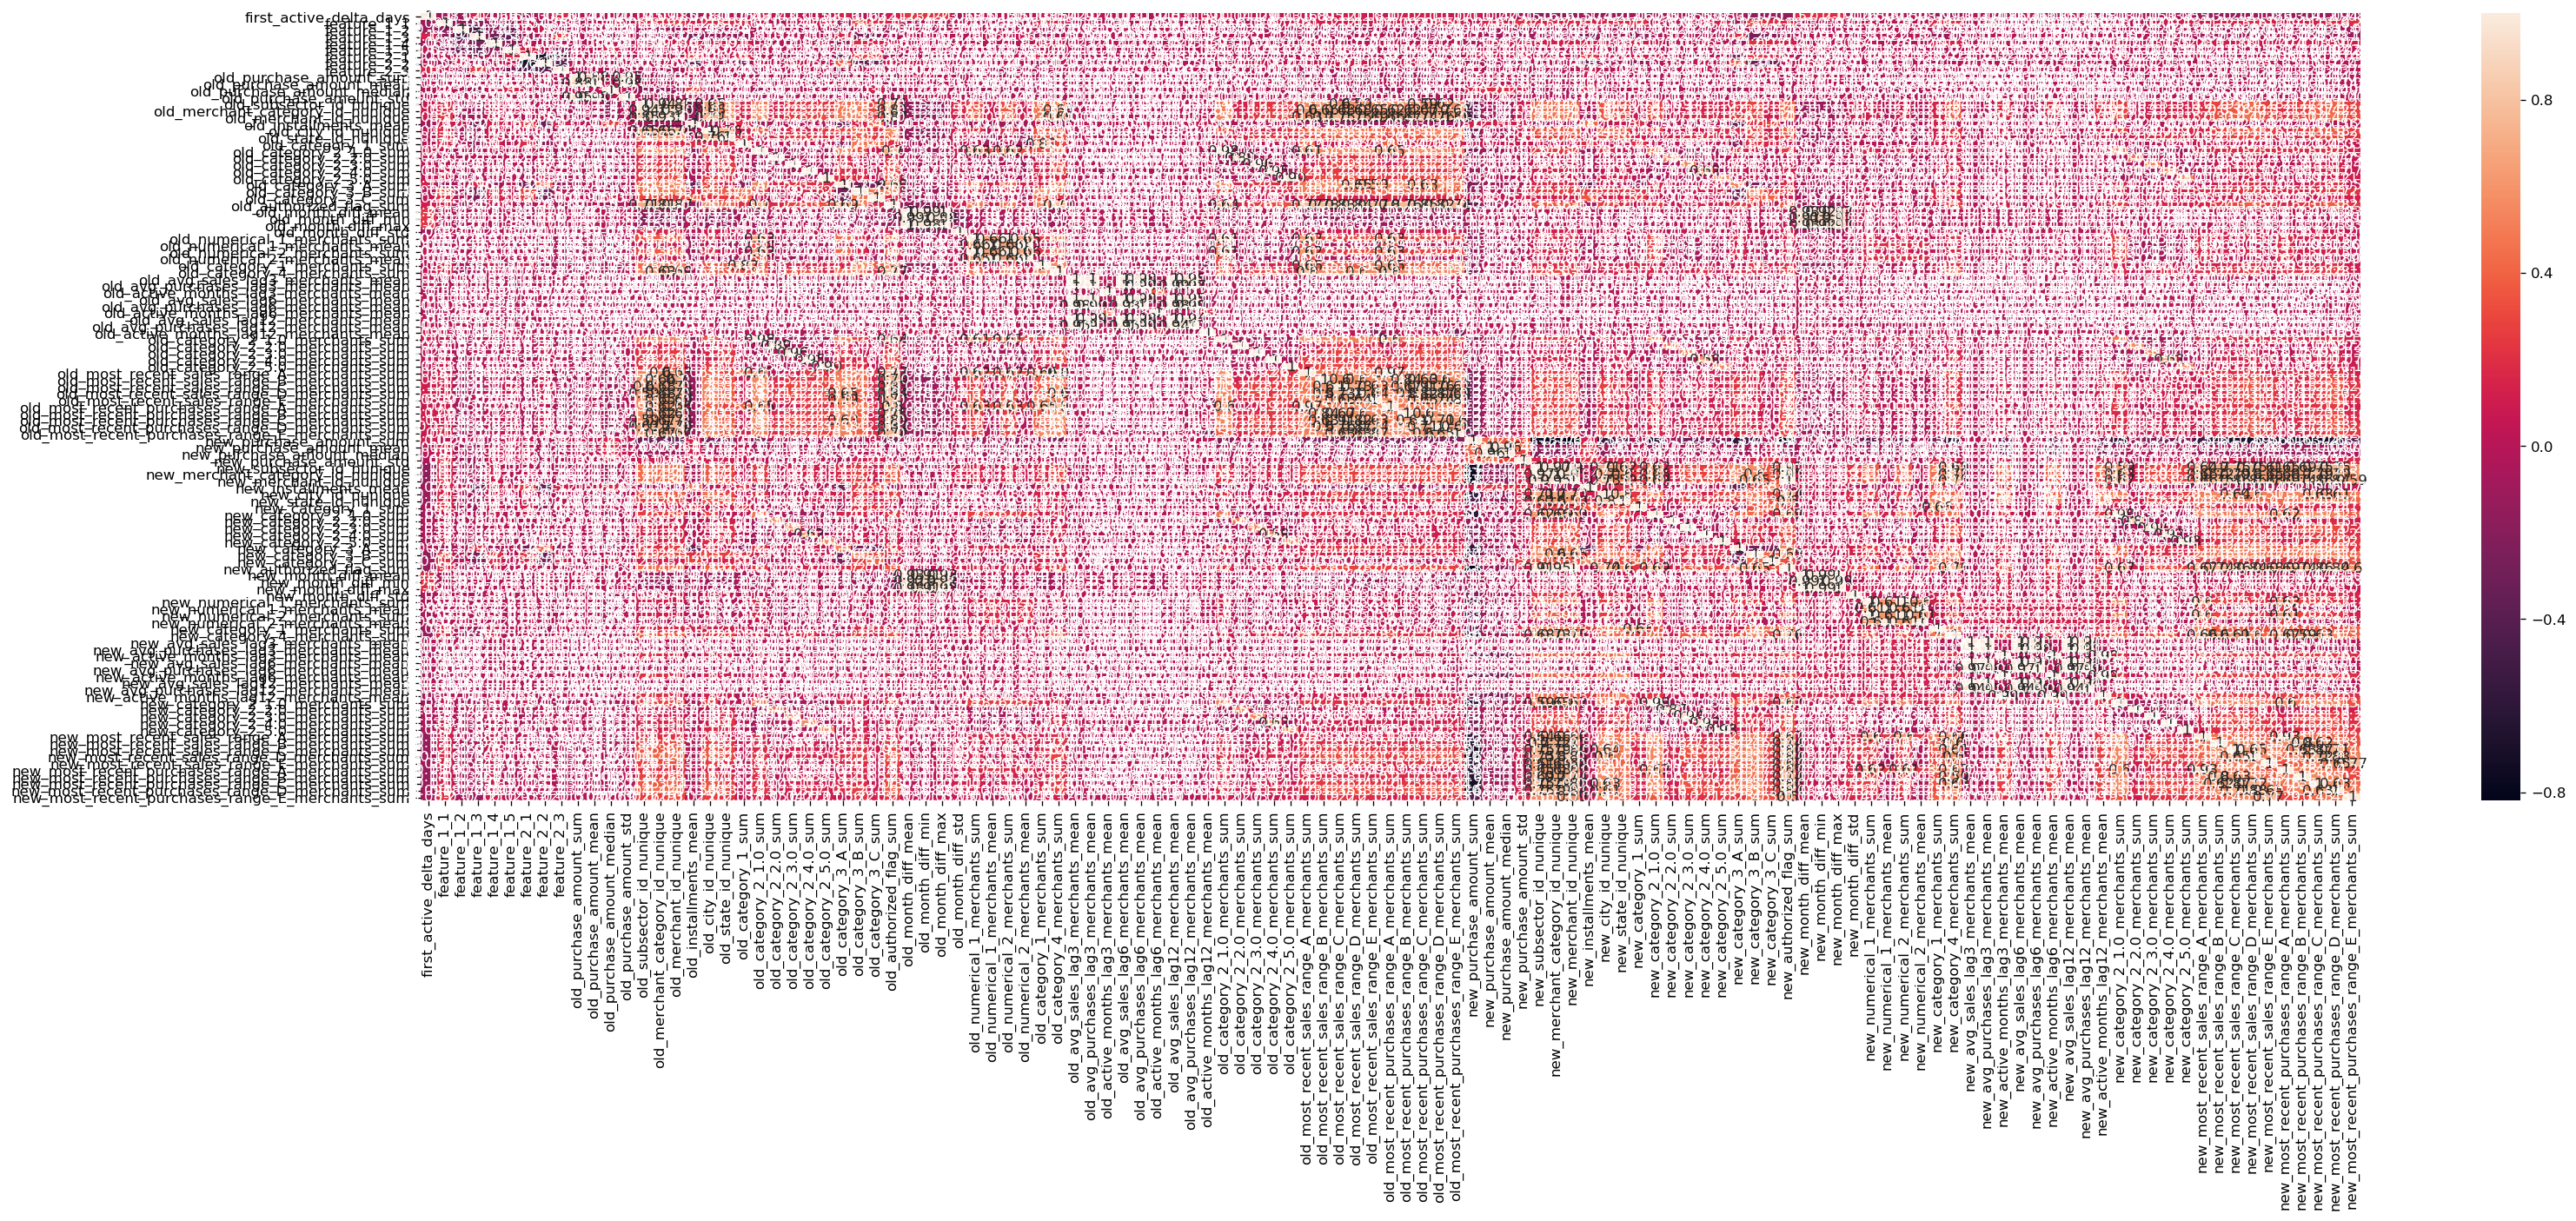

In [4]:
train_sm = train[train.columns[1:]][:5000]
corr = train_sm.corr()
plt.figure(num=None, figsize=(30,10), dpi=120, facecolor='w', edgecolor='k')
sb.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True
          )

# Note the strong negative correlations to new_purchase_amount_sum. 
# I suspect this is because of the zero filled values when we joined
# train with transactions_new (which don't line up 1:1)

# When we reduce features this will be less ugly again

In [5]:
train_sm = train[train.columns[1:]][:10]
# cov = np.cov(train_sm, ddof=1)
# display(pd.DataFrame(cov))
print(train_sm[1:])

train_sm.to_csv('input/foo.csv')



                 first_active_delta_days  feature_1_1  feature_1_2  \
card_id                                                              
C_ID_3d0044924f                      397            0            0   
C_ID_d639edf6cd                      550            0            1   
C_ID_186d6a6901                      154            0            0   
C_ID_cdbd2c0db2                       93            1            0   
C_ID_0894217f2f                      519            0            0   
C_ID_7e63323c00                      428            0            0   
C_ID_dfa21fc124                      154            0            0   
C_ID_fe0fdac8ea                      185            0            1   
C_ID_bf62c0b49d                      550            0            1   

                 feature_1_3  feature_1_4  feature_1_5  feature_2_1  \
card_id                                                               
C_ID_3d0044924f            0            1            0            1   
C_ID_d639edf6cd 

## Train and test model using ALL engineered features 

In [6]:
for col in train.columns:
    print("'{}',".format(col))

'feature_3',
'first_active_delta_days',
'feature_1_1',
'feature_1_2',
'feature_1_3',
'feature_1_4',
'feature_1_5',
'feature_2_1',
'feature_2_2',
'feature_2_3',
'old_purchase_amount_sum',
'old_purchase_amount_mean',
'old_purchase_amount_median',
'old_purchase_amount_std',
'old_subsector_id_nunique',
'old_merchant_category_id_nunique',
'old_merchant_id_nunique',
'old_installments_mean',
'old_city_id_nunique',
'old_state_id_nunique',
'old_category_1_sum',
'old_category_2_1.0_sum',
'old_category_2_2.0_sum',
'old_category_2_3.0_sum',
'old_category_2_4.0_sum',
'old_category_2_5.0_sum',
'old_category_3_A_sum',
'old_category_3_B_sum',
'old_category_3_C_sum',
'old_authorized_flag_sum',
'old_month_diff_mean',
'old_month_diff_min',
'old_month_diff_max',
'old_month_diff_std',
'old_numerical_1_merchants_sum',
'old_numerical_1_merchants_mean',
'old_numerical_2_merchants_sum',
'old_numerical_2_merchants_mean',
'old_category_1_merchants_sum',
'old_category_4_merchants_sum',
'old_avg_sales_lag3_merchan

## Test area to play with different sets of features

In [24]:
def feature_play():
    np.random.seed(0)
    #This is just to play around with different engineered features. 

    
    train_selecte_features = train[[
        'feature_3',
        'first_active_delta_days',
        'feature_1_1',
        'feature_1_2',
        'feature_1_3',
        'feature_1_4',
        'feature_1_5',
        'feature_2_1',
        'feature_2_2',
        'feature_2_3',
        'old_purchase_amount_sum',
        'old_purchase_amount_mean',
        'old_purchase_amount_median',
        'old_purchase_amount_std',
        'old_subsector_id_nunique',
        'old_merchant_category_id_nunique',
        'old_merchant_id_nunique',
        'old_installments_mean',
        'old_city_id_nunique',
        'old_state_id_nunique',
        'old_category_1_sum',
        'old_category_2_1.0_sum',
        'old_category_2_2.0_sum',
        'old_category_2_3.0_sum',
        'old_category_2_4.0_sum',
        'old_category_2_5.0_sum',
        'old_category_3_A_sum',
        'old_category_3_B_sum',
        'old_category_3_C_sum',
        'old_authorized_flag_sum',
        'old_month_diff_mean',
        'old_month_diff_min',
        'old_month_diff_max',
        'old_month_diff_std',
        'old_numerical_1_merchants_sum',
        'old_numerical_1_merchants_mean',
        'old_numerical_2_merchants_sum',
        'old_numerical_2_merchants_mean',
        'old_category_1_merchants_sum',
        'old_category_4_merchants_sum',
        'old_avg_sales_lag3_merchants_mean',
#         'old_avg_purchases_lag3_merchants_mean',  #NaN
        'old_active_months_lag3_merchants_mean',
        'old_avg_sales_lag6_merchants_mean',
#         'old_avg_purchases_lag6_merchants_mean',  #NaN
        'old_active_months_lag6_merchants_mean',
        'old_avg_sales_lag12_merchants_mean',
#         'old_avg_purchases_lag12_merchants_mean',  #NaN
        'old_active_months_lag12_merchants_mean',
        'old_category_2_1.0_merchants_sum',
        'old_category_2_2.0_merchants_sum',
        'old_category_2_3.0_merchants_sum',
        'old_category_2_4.0_merchants_sum',
        'old_category_2_5.0_merchants_sum',
        'old_most_recent_sales_range_A_merchants_sum',
        'old_most_recent_sales_range_B_merchants_sum',
        'old_most_recent_sales_range_C_merchants_sum',
        'old_most_recent_sales_range_D_merchants_sum',
        'old_most_recent_sales_range_E_merchants_sum',
        'old_most_recent_purchases_range_A_merchants_sum',
        'old_most_recent_purchases_range_B_merchants_sum',
        'old_most_recent_purchases_range_C_merchants_sum',
        'old_most_recent_purchases_range_D_merchants_sum',
        'old_most_recent_purchases_range_E_merchants_sum',
        'new_purchase_amount_sum',
        'new_purchase_amount_mean',
        'new_purchase_amount_median',
        'new_purchase_amount_std',
        'new_subsector_id_nunique',
        'new_merchant_category_id_nunique',
        'new_merchant_id_nunique',
        'new_installments_mean',
        'new_city_id_nunique',
        'new_state_id_nunique',
        'new_category_1_sum',
        'new_category_2_1.0_sum',
        'new_category_2_2.0_sum',
        'new_category_2_3.0_sum',
        'new_category_2_4.0_sum',
        'new_category_2_5.0_sum',
        'new_category_3_A_sum',
        'new_category_3_B_sum',
        'new_category_3_C_sum',
        'new_authorized_flag_sum',
        'new_month_diff_mean',
        'new_month_diff_min',
        'new_month_diff_max',
        'new_month_diff_std',
        'new_numerical_1_merchants_sum',
        'new_numerical_1_merchants_mean',
        'new_numerical_2_merchants_sum',
        'new_numerical_2_merchants_mean',
        'new_category_1_merchants_sum',
        'new_category_4_merchants_sum',
        'new_avg_sales_lag3_merchants_mean',
        'new_avg_purchases_lag3_merchants_mean',
        'new_active_months_lag3_merchants_mean',
        'new_avg_sales_lag6_merchants_mean',
        'new_avg_purchases_lag6_merchants_mean',
        'new_active_months_lag6_merchants_mean',
        'new_avg_sales_lag12_merchants_mean',
        'new_avg_purchases_lag12_merchants_mean',
        'new_active_months_lag12_merchants_mean',
        'new_category_2_1.0_merchants_sum',
        'new_category_2_2.0_merchants_sum',
        'new_category_2_3.0_merchants_sum',
        'new_category_2_4.0_merchants_sum',
        'new_category_2_5.0_merchants_sum',
        'new_most_recent_sales_range_A_merchants_sum',
        'new_most_recent_sales_range_B_merchants_sum',
        'new_most_recent_sales_range_C_merchants_sum',
        'new_most_recent_sales_range_D_merchants_sum',
        'new_most_recent_sales_range_E_merchants_sum',
        'new_most_recent_purchases_range_A_merchants_sum',
        'new_most_recent_purchases_range_B_merchants_sum',
        'new_most_recent_purchases_range_C_merchants_sum',
        'new_most_recent_purchases_range_D_merchants_sum',
        'new_most_recent_purchases_range_E_merchants_sum'
    ]]
    
    
    data_len = len(train)
    mask = np.random.rand(data_len) < 0.8

    train_data = train_selecte_features.values[mask]
    train_labels = target.values.flatten()[mask]
    test_data = train_selecte_features.values[~mask]
    test_labels = target.values.flatten()[~mask]

    X = train_data
    y = train_labels

    X_test = test_data
    y_test = test_labels

    reg = LinearRegression()
    reg.fit(X, y)

    y_pred_reg = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_reg)

    y_mean = train_labels.mean()
    y_test_mean = test_labels.mean()

    print("Using the following features, the Mean Squared Error is: {:0.3f}".format(mse))
    print(train_selecte_features.columns)
    
    return mse

# if play_mse:
#     print("Previous MSE: {:0.3f}".format(play_mse))
    
play_mse = feature_play()

Using the following features, the Mean Squared Error is: 15.174
Index(['feature_3', 'first_active_delta_days', 'feature_1_1', 'feature_1_2',
       'feature_1_3', 'feature_1_4', 'feature_1_5', 'feature_2_1',
       'feature_2_2', 'feature_2_3',
       ...
       'new_most_recent_sales_range_A_merchants_sum',
       'new_most_recent_sales_range_B_merchants_sum',
       'new_most_recent_sales_range_C_merchants_sum',
       'new_most_recent_sales_range_D_merchants_sum',
       'new_most_recent_sales_range_E_merchants_sum',
       'new_most_recent_purchases_range_A_merchants_sum',
       'new_most_recent_purchases_range_B_merchants_sum',
       'new_most_recent_purchases_range_C_merchants_sum',
       'new_most_recent_purchases_range_D_merchants_sum',
       'new_most_recent_purchases_range_E_merchants_sum'],
      dtype='object', length=115)
